# Google play scraping 

In [61]:
#import dependencies
import pandas as pd
from google_play_scraper import Sort, reviews
from google_play_scraper import reviews_all
import csv
from datetime import datetime
import schedule
import time
import os

# Banks to scrape (replace with actual app IDs)
  - CBE
  - DASHEN Bank 
  - BOA 

In [35]:
# google play store bank app scraping 
banks = [
    'com.combanketh.mobilebanking',  # Commercial Bank of Ethiopia
    'com.dashen.dashensuperapp',    # Dashen Bank
    'com.boa.boaMobileBanking'      # Bank of Abyssinia
]
all_reviews = []

**1. Collecting individual bank Reviews**

In [36]:
# 
for bank in banks:
    try:
        reviews = reviews_all(
            app_id=bank,
            sleep_milliseconds=0,
            lang='en',
            country='us'
        )
        all_reviews.extend(reviews[:400])
    except Exception as e:
        print(f"Error fetching {bank}: {e}")


**2. Normalize Date**

In [37]:
df=pd.DataFrame(all_reviews)
# Convert 'at' column to datetime
df['at'] = pd.to_datetime(df['at'], unit='ms')
df.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,d0c05687-ddd4-43fb-95a9-08f6358d80a2,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,really am happy to this app it is Siple to use...,5,0,5.1.0,2025-06-07 11:02:38,None,None,5.1.0
1,811bf820-3529-433a-9b6d-e624fa23a16a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I liked this app. But the User interface is ve...,2,0,5.1.0,2025-06-07 10:50:29,None,None,5.1.0
2,be2cb2ac-bbe0-4175-81c4-9f6c86afdaaa,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"""Why don’t your ATMs support account-to-accoun...",4,0,None,2025-06-06 09:54:11,None,None,None
3,8efd71e9-59cd-41ce-8c5c-12052dee9ad0,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,what is this app problem???,1,0,5.1.0,2025-06-05 22:16:56,None,None,5.1.0
4,b12d0383-9b27-4e49-a94d-277a43b15800,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,the app is proactive and a good connections.,5,0,5.1.0,2025-06-05 15:55:10,None,None,5.1.0
5,dd9f9e37-177a-46df-b877-d0edaa9aed29,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I cannot send to cbebirr app. through this app.,3,0,None,2025-06-05 11:12:49,None,None,None
6,8e34703c-203c-4180-8b32-bfd0b3f0c871,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,good,4,0,None,2025-06-05 10:21:59,None,None,None
7,6f0c7fa2-3ce1-4310-b135-54fe0cb9fccd,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,not functional,1,0,5.1.0,2025-06-05 07:38:12,None,None,5.1.0
8,f0dd744a-9409-4619-9800-7ea501571b09,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,everytime you uninstall the app you have to re...,1,0,5.1.0,2025-06-04 21:33:36,None,None,5.1.0
9,3949d8e0-7ac4-4b43-b4f4-a45d6a888a85,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,አካውንት የምናስገባበት ቦታ ስም ጽፈን ነው ከዚህ በፊት የላክንባቸውን አ...,4,0,5.1.0,2025-06-04 20:54:30,None,None,5.1.0


**3.Save the scraping to CSV file**

In [38]:
#save the scraped to existing Data folder

df.to_csv('F:/Bank-Reviews-Analysis/Data/google_play_bank _reviews.csv', index=False, encoding='utf-8-sig')
print("Data saved to 'F:/Bank-Reviews-Analysis/Data/google_play_bank_reviews.csv' successfully.")

Data saved to 'F:/Bank-Reviews-Analysis/Data/google_play_bank_reviews.csv' successfully.


**4. Length  of scraped Reviews**

In [39]:
# length of the DataFrame
print(f"Total reviews collected: {len(df)}")

Total reviews collected: 1200


 # Data Cleaning 
 1.**Rename of same column for clarity**

In [41]:

df_reviews = df.rename(columns={
    'content': 'review_text',
    'score': 'rating',
    'at': 'review_date',
    'reviewId': 'review_id',
    'userName': 'userName'  
})
df_reviews['source'] ='Google play'

**2.Remove of duplicate and Check for missing data if any**

In [ ]:
#handle duplicate reviews
df=df_reviews.drop_duplicates(subset=['review_id','review_text','rating'], inplace=True)
#print the duplicate reviews
print(f"Total duplicate reviews removed: " + str(df))
#check for missing values
missing_values = df_reviews.isnull().sum()
print("Missing values in each column:")
print(missing_values)
#drop missing values
Missing_value=df_reviews.dropna()
#print the missing values
print(f"Total missing values removed: {len(Missing_value)}")


Total duplicate reviews removed: None
Missing values in each column:
review_id                  0
userName                   0
userImage                  0
review_text                0
rating                     0
thumbsUpCount              0
reviewCreatedVersion     281
review_date                0
replyContent            1200
repliedAt               1200
appVersion               281
source                     0
dtype: int64
Total missing values removed: 0


In [54]:
#save the cleaned data to csv file
df_reviews.to_csv('F:/Bank-Reviews-Analysis/Data/google_play_bank_reviews_cleaned.csv', index=False, encoding='utf-8-sig')
print("Cleaned data saved to 'F:/Bank-Reviews-Analysis/Data/google_play_bank_reviews_cleaned.csv' successfully.")

Cleaned data saved to 'F:/Bank-Reviews-Analysis/Data/google_play_bank_reviews_cleaned.csv' successfully.


**visualization cleaned data**

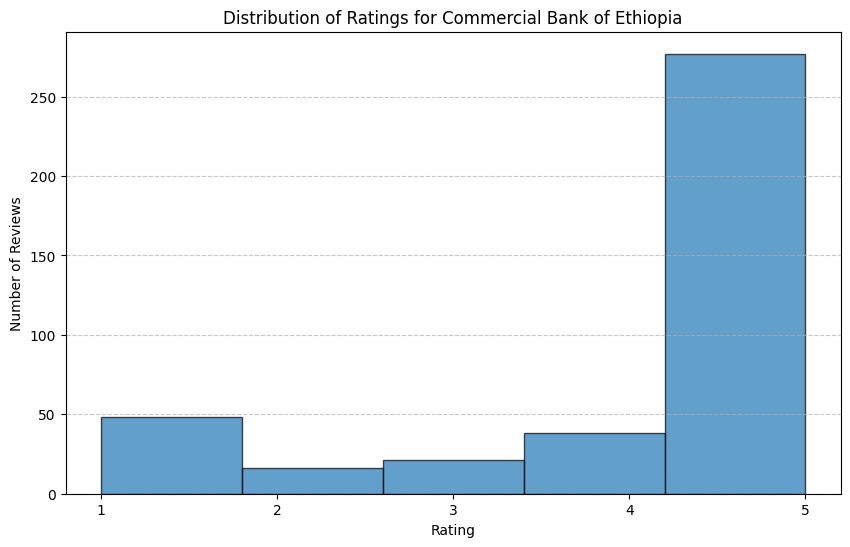

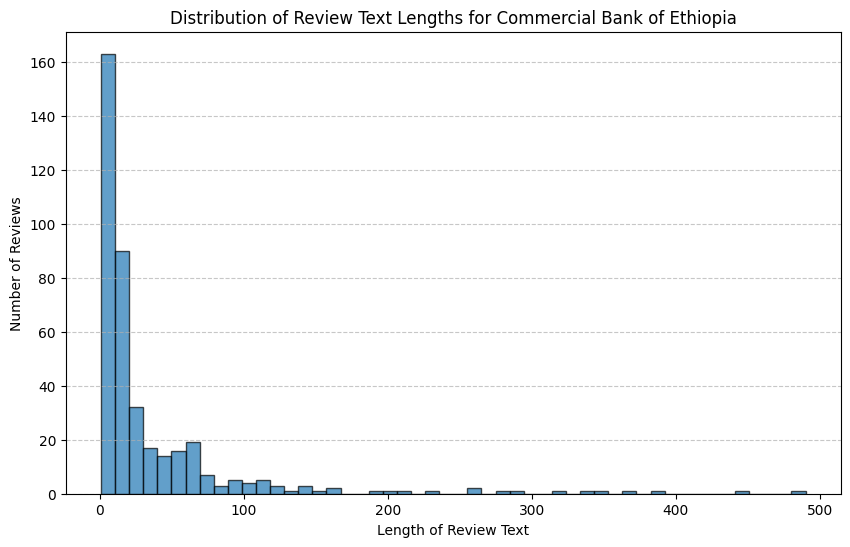

In [73]:
#Extract the first 400 raw from df_reviews
CBE_bank = df_reviews.iloc[:400]
#save the CBE bank reviews to csv file
CBE_bank.to_csv('F:/Bank-Reviews-Analysis/Data/CBE_bank_reviews.csv', index=False, encoding='utf-8-sig')
CBE_bank.head(10)
#visualization CBE bank reviews
plt.figure(figsize=(10, 6))
plt.hist(CBE_bank['rating'], bins=5, edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings for Commercial Bank of Ethiopia')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
#Reveiw_text visualization
plt.figure(figsize=(10, 6))
plt.hist(CBE_bank['review_text'].str.len(), bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Review Text Lengths for Commercial Bank of Ethiopia')    
plt.xlabel('Length of Review Text')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



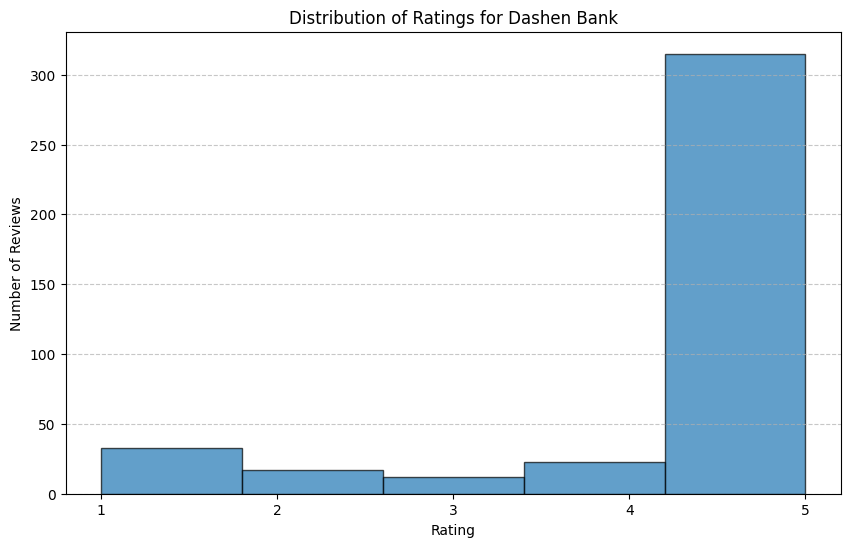

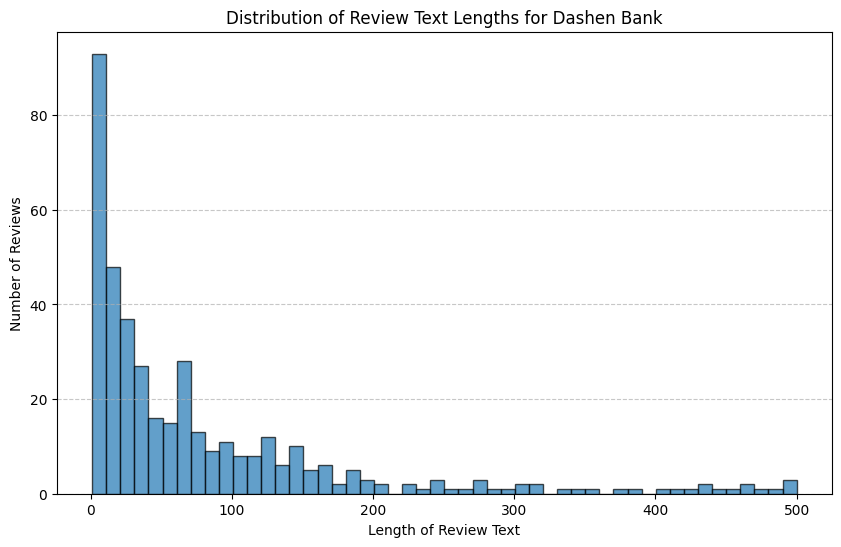

In [71]:
Dashen_Bank = df_reviews.iloc[400:800]
#save the Dashen bank reviews to csv file
Dashen_Bank.to_csv('F:/Bank-Reviews-Analysis/Data/Dashen_Bank_reviews.csv', index=False, encoding='utf-8-sig')
#visualization Dashen bank reviews
plt.figure(figsize=(10, 6))
plt.hist(Dashen_Bank['rating'], bins=5, edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings for Dashen Bank')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
#Reveiw_text visualization
#boxplot for review text length
plt.figure(figsize=(10, 6))
plt.hist(Dashen_Bank['review_text'].str.len(), bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Review Text Lengths for Dashen Bank')
plt.xlabel('Length of Review Text')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

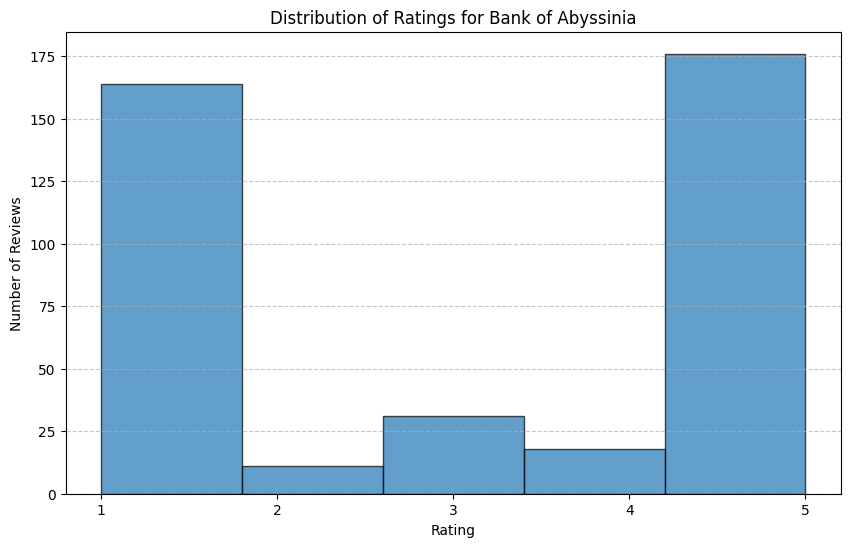

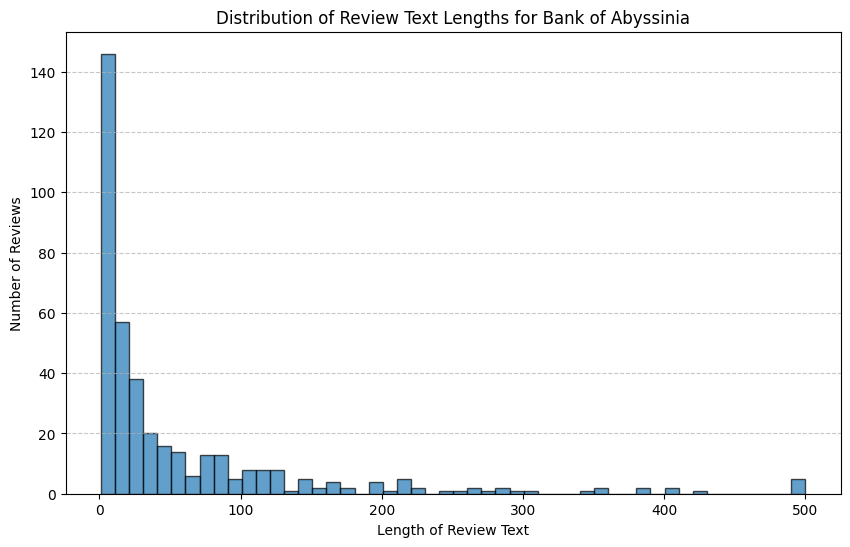

In [74]:
BOA_Bank = df_reviews.iloc[800:1200]
#save the BOA bank Absinia bank reviews to csv file
BOA_Bank.to_csv('F:/Bank-Reviews-Analysis/Data/BOA_Bank_reviews.csv', index=False, encoding='utf-8-sig')
#visualization BOA bank reviews
plt.figure(figsize=(10, 6))
plt.hist(BOA_Bank['rating'], bins=5, edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings for Bank of Abyssinia')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
#Reveiw_text visualization
plt.figure(figsize=(10, 6))
plt.hist(BOA_Bank['review_text'].str.len(), bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Review Text Lengths for Bank of Abyssinia')
plt.xlabel('Length of Review Text')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
